In [1]:
#note book to test and pre process the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_ori = pd.read_csv('D:\\2023_Semester1\\IND5003 data analysis for sense-making\\Project_Data Analysis on Vehicle Charge Plots\\data\\combined_ev_charging_data.csv')
print(df_ori.describe())
print(df_ori.head())
df_ori.info()

         Unnamed: 0  charging_event_id         cp_id       con_num  \
count  24224.000000       2.422400e+04  24224.000000  24224.000000   
mean   12111.500000       6.685242e+06  69864.836773      1.517875   
std     6993.010797       3.232761e+06   6534.680513      0.499691   
min        0.000000       2.339780e+05  51467.000000      1.000000   
25%     6055.750000       2.642946e+06  70201.000000      1.000000   
50%    12111.500000       8.134550e+06  70203.000000      2.000000   
75%    18167.250000       9.152640e+06  70206.000000      2.000000   
max    24223.000000       1.265490e+07  81028.000000      2.000000   

          total_kwh  charging_cost  
count  23927.000000    2278.000000  
mean      11.322781       0.316945  
std        9.532230       0.465388  
min      -94.750000       0.000000  
25%        6.520000       0.000000  
50%        9.900000       0.000000  
75%       14.785000       1.000000  
max      444.990000       1.000000  
   Unnamed: 0  charging_event_id   u

In [3]:
print(df_ori['charging_cost'].dropna().describe())

count    2278.000000
mean        0.316945
std         0.465388
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: charging_cost, dtype: float64


1. For charging_cost, ealisy to see that all of them not only have no measurement unit but also contains no number other than 0 and 1, so it can be considered as useless. 

2. By reading the dataset we can see that when user_id is abscent, uid contains the 'id' information, so we can append uid into user_id accordingly to fill the NaNs.

In [4]:
def fill_missing_values(df, i, j):
    # use uid to fill the user id
    df[df.columns[i]].fillna(df[df.columns[j]], inplace=True)
    return df
df = fill_missing_values(df_ori, 2, 11)
df = df_ori.drop(df_ori.columns[-2:], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         24224 non-null  int64  
 1   charging_event_id  24224 non-null  int64  
 2   user_id            24224 non-null  object 
 3   cp_id              24224 non-null  int64  
 4   con_num            24224 non-null  int64  
 5   start_date         24224 non-null  object 
 6   start_time         24224 non-null  object 
 7   end_date           23927 non-null  object 
 8   total_kwh          23927 non-null  float64
 9   site               24224 non-null  object 
 10  charger_model      24224 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 2.0+ MB


Now all the userid info are filled, need to analyze how to deal with end_date and total_kwh

In [5]:
df['start_date'] = pd.to_datetime(df['start_date'], format='%d/%m/%Y', errors='coerce')
df['end_date'] = pd.to_datetime(df['end_date'], format='%d/%m/%Y', errors='coerce')
df['time_gap'] = df['start_date'] - df['end_date']
print(df.time_gap.describe())
df.info()

count                          19847
mean      49 days 09:46:58.219378243
std      968 days 07:48:14.802703088
min              -151 days +00:00:00
25%                -1 days +00:00:00
50%                  0 days 00:00:00
75%                  0 days 00:00:00
max              18396 days 00:00:00
Name: time_gap, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   Unnamed: 0         24224 non-null  int64          
 1   charging_event_id  24224 non-null  int64          
 2   user_id            24224 non-null  object         
 3   cp_id              24224 non-null  int64          
 4   con_num            24224 non-null  int64          
 5   start_date         20193 non-null  datetime64[ns] 
 6   start_time         24224 non-null  object         
 7   end_date           19960 non-null  datetime64[ns] 
 8   

as we can see that over 75% of time_gap are 0 days, which means that majority of people will charge and leave in the same date. so we can fill the missing value in end_date with start_date

we also need to change the date into same format

remember that if time_gap < 0, the format is wrong

In [14]:
df['start_date'].fillna(pd.to_datetime(df_ori['start_date'], format='%m/%d/%Y', errors='coerce'), inplace=True)
#df['end_date'] = df_ori['end_date']
df['end_date'].fillna(pd.to_datetime(df_ori['end_date'], format='%m/%d/%Y', errors='coerce'), inplace=True)
df = fill_missing_values(df, 7, 5)# fill the rest NaN in end_date with start_date
df.end_date
df['time_gap'] = df['start_date'] - df['end_date']
print(df.info())
df.time_gap.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   Unnamed: 0         24224 non-null  int64          
 1   charging_event_id  24224 non-null  int64          
 2   user_id            24224 non-null  object         
 3   cp_id              24224 non-null  int64          
 4   con_num            24224 non-null  int64          
 5   start_date         24224 non-null  datetime64[ns] 
 6   start_time         24224 non-null  object         
 7   end_date           24224 non-null  datetime64[ns] 
 8   total_kwh          23927 non-null  float64        
 9   site               24224 non-null  object         
 10  charger_model      24224 non-null  object         
 11  time_gap           24224 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), float64(1), int64(4), object(4), timedelta64[ns](1)
memory usage: 2.2+ MB
None


count                           24224
mean       60 days 07:39:23.540290621
std      1053 days 04:16:04.217915424
min               -187 days +00:00:00
25%                 -1 days +00:00:00
50%                   0 days 00:00:00
75%                   0 days 00:00:00
max               18396 days 00:00:00
Name: time_gap, dtype: object

correctly calculated the time_gap means that all start_date and end_date are in the same format.

In [18]:
select = df[df['time_gap'] > '0']
print(select)

       Unnamed: 0  charging_event_id   user_id  cp_id  con_num start_date  \
2051         2051             278553   User 42  70203        1 2014-12-08   
2169         2169            9424614  User 744  80164        2 2020-01-07   
2213         2213            9430599  User 753  80164        2 2020-01-08   
2310         2310            9446573  User 541  80164        2 2020-01-12   
2351         2351            9450584  User 489  80164        2 2020-01-13   
...           ...                ...       ...    ...      ...        ...   
22885       22885            2083321  User 624  70202        2 2016-11-30   
22886       22886            2083325  User 623  70202        1 2016-11-30   
22887       22887            2083330  User 621  70201        2 2016-11-30   
22888       22888            2083342  User 613  70200        2 2016-11-30   
22889       22889            2083391  User 612  70200        1 2016-11-30   

      start_time   end_date  total_kwh                       site  \
2051  

total_kwh
 0.000     775
 0.010      55
 0.020      42
 9.050      29
 6.230      29
          ... 
 10.736      1
 1.190       1
 69.510      1
 27.970      1
-4.260       1
Name: count, Length: 3660, dtype: int64

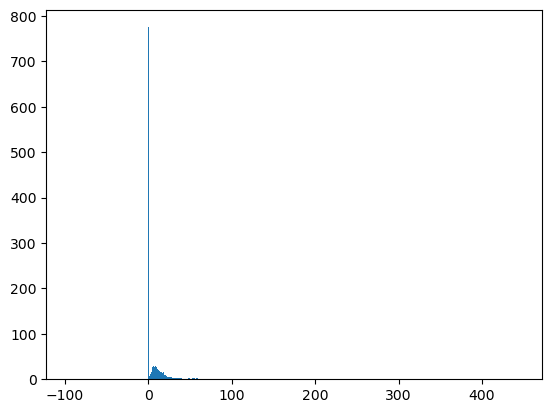

In [15]:
tk_vc = df['total_kwh'].value_counts()
x = tk_vc.index
y = tk_vc.values
plt.bar(x, y)
tk_vc

In [52]:
id_vc = df['user_id'].value_counts()
'''x = id_vc.index
y = id_vc.values
plt.bar(x, y)'''


'x = id_vc.index\ny = id_vc.values\nplt.bar(x, y)'